**Ke≈üif veri analizi ( EDA )**, veri setlerinin temel √∂zelliklerini genellikle g√∂rsel y√∂ntemlerle √∂zetlemek i√ßin analiz etmeye y√∂nelik bir yakla≈üƒ±mdƒ±r.

**Seaborn :** istatistiksel veri g√∂rselle≈ütirme, EDA ger√ßekle≈ütirmek i√ßin pop√ºler bir Python kitaplƒ±ƒüƒ±dƒ±r.

Matplotlib tabanlƒ±dƒ±r ve √ßekici ve bilgilendirici istatistiksel grafikler √ßizmek i√ßin √ºst d√ºzey bir aray√ºz saƒülar.

Bu g√∂nderide √∂rnek olarak kazƒ±nmƒ±≈ü ve temizlenmi≈ü bir YouTube veri k√ºmesini kullanacaƒüƒ±z .

In [1]:
import os 
os.chdir("C:\\Users\\Excalibur\\Desktop\\VERƒ∞ Bƒ∞Lƒ∞Mƒ∞\\_____VERƒ∞_SETLERƒ∞_____")

In [2]:
import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # uyarƒ±larƒ± g√∂rmezden gel

In [3]:
df = pd.read_pickle("sydney.pkl")

In [4]:
df.head()

title posted_ago  length  \
0       30 Minute HIIT Workout üî•Burn 500 Calories! üî•     1 year    31.0   
1      30 Minute HIIT Tabata Workout Sydney Cummings     1 year    31.0   
2  30 Minute Abs Workout With Sydney Cummings | B...     1 year    32.0   
3    30 Minute Total Body HIIT üî•Burn 430 Calories! üî•     1 year    31.0   
4  30 Minute Workout For Beginners üî•Burn 285 Calo...     1 year    31.0   

    views                  link  calories       date  days_since_posted  \
0  197591  /watch?v=Mcpyp9PRtU8     500.0 2018-02-01              711.0   
1   75863  /watch?v=m40O_U8_4UE       NaN 2018-02-06              706.0   
2   60328  /watch?v=DWUupF-Sfyc     350.0 2018-02-08              704.0   
3   59741  /watch?v=R3T3U9iFg0o     430.0 2018-02-11              701.0   
4   18515  /watch?v=TLeMsJG30zU     285.0 2018-02-12              700.0   

                                      title_word_set  area  ...  \
0  {calori, hiit, 30, !, workout, minut, 500, üî•bu...  full  ...   
1    {hiit, 30, tabata, sydney, cum, workout, minut}  full  ...   
2  {calori, |, burn, with, 30, 350, !, ab, sydney...    ab  ...   
3  {calori, hiit, minut, !, total, bodi, 30, 430,...  full  ...   
4  {285, calori, 30, !, beginn, for, workout, min...  full  ...   

  title_contains_tone  title_contains_kickboxing  title_contains_workout  \
0               False                      False                    True   
1               False                      False                    True   
2               False                      False                    True   
3               False                      False                   False   
4               False                      False                    True   

   title_contains_boot camp  title_contains_burnout  title_contains_toned  \
0                     False                   False                 False   
1                     False                   False                 False   
2                     False                   False                 False   
3                     False                   False                 False   
4                     False                   False                 False   

   title_contains_superset  num_body_areas  num_workout_types  \
0                    False               1                  2   
1                    False               1                  3   
2                    False               1                  2   
3                    False               1                  1   
4                    False               1                  2   

   num_other_keywords  
0                   1  
1                   1  
2                   1  
3                   0  
4                   1  

[5 rows x 60 columns]

## Tek Deƒüi≈ükenli Analiz: Sayƒ±sal Deƒüi≈üken
ƒ∞lk √∂nce sayƒ±sal tek deƒüi≈ükenli deƒüi≈ükenleri inceleyelim.

**select_dtypes():** 
Bu fonksiyon, dataframe i√ßindeki istenilen veri tipindeki s√ºtunlarƒ± kullanƒ±cƒ±ya d√∂nd√ºrmektedir.

In [5]:
df_numeric = df.select_dtypes(include="number") # include: dahil et, exclude: hari√ß tut
df_numeric

length   views  calories  days_since_posted  num_body_areas  \
0      31.0  197591     500.0              711.0               1   
1      31.0   75863       NaN              706.0               1   
2      32.0   60328     350.0              704.0               1   
3      31.0   59741     430.0              701.0               1   
4      31.0   18515     285.0              700.0               1   
..      ...     ...       ...                ...             ...   
724    43.0   23454     350.0                4.0               1   
725    45.0   23036     490.0                3.0               1   
726    34.0   21364     360.0                2.0               1   
727    22.0    6683       NaN                1.0               1   
728    45.0    8825     395.0                0.0               1   

     num_workout_types  num_other_keywords  
0                    2                   1  
1                    3                   1  
2                    2                   1  
3                    1                   0  
4                    2                   1  
..                 ...                 ...  
724                  2                   1  
725                  2                   1  
726                  2                   2  
727                  1                   0  
728                  2                   2  

[729 rows x 7 columns]

## Histogram: Tek Deƒüi≈üken

* **bins :** Kalƒ±plarƒ± ke≈üfetmek i√ßin deƒüi≈ükeni farklƒ± b√∂lme ayarlarƒ±yla √ßizmek yararlƒ±dƒ±r. Bu deƒüeri ayarlamazsak, k√ºt√ºphane bizim i√ßin yararlƒ± bir varsayƒ±lan bulacaktƒ±r.
* **kde :** bir Gauss √ßekirdek yoƒüunluƒüu tahmininin √ßizilip √ßizilmeyeceƒüini belirler.
Bu, s√ºrekli bir rasgele deƒüi≈ükenin olasƒ±lƒ±k yoƒüunluk fonksiyonunun ≈üeklini tahmin etmeye yardƒ±mcƒ± olur. 
* **rug :** destek ekseninde bir halƒ± grafiƒüi √ßizilip √ßizilmeyeceƒüini belirler.
Bu, her g√∂zlemde k√º√ß√ºk bir dikey i≈üaret √ßizer. Deƒüi≈üken i√ßin deƒüerlerin tam konumunu bilmeye yardƒ±mcƒ± olur.

<AxesSubplot:xlabel='length', ylabel='Density'>

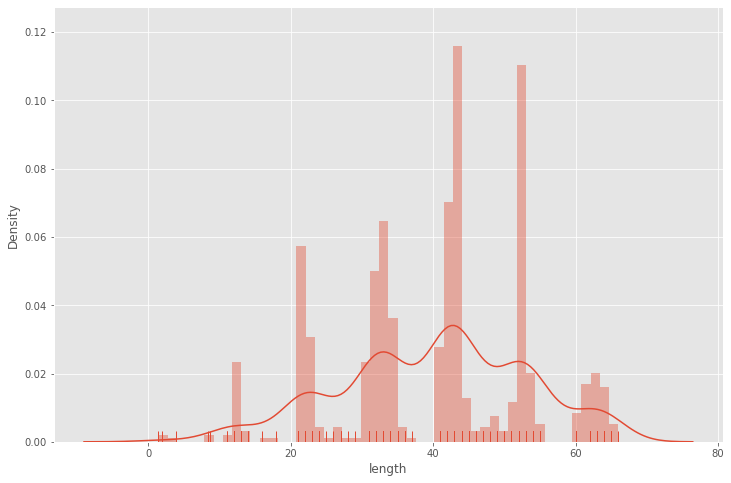

In [6]:
sns.distplot(df_numeric["length"], bins=50, kde=True, rug=True)

* Sydney'in kanalƒ±nƒ±n videolarƒ±nƒ±n uzunluƒüu genellikle 30, 40 veya 50 dakikadƒ±r ve bu √ßok modlu bir model sunar.

## Histogram: √áoklu Deƒüi≈ükenler
Genellikle, birden √ßok sayƒ±sal deƒüi≈ükeni g√∂rselle≈ütirmek ve bunlara birlikte bakmak isteriz.

Belirli bir deƒüi≈üken grubu i√ßin histogramlarƒ± √ßizmek i√ßin a≈üaƒüƒ±daki **plot_multiple_histograms** fonksiyonunu olu≈üturuyoruz 

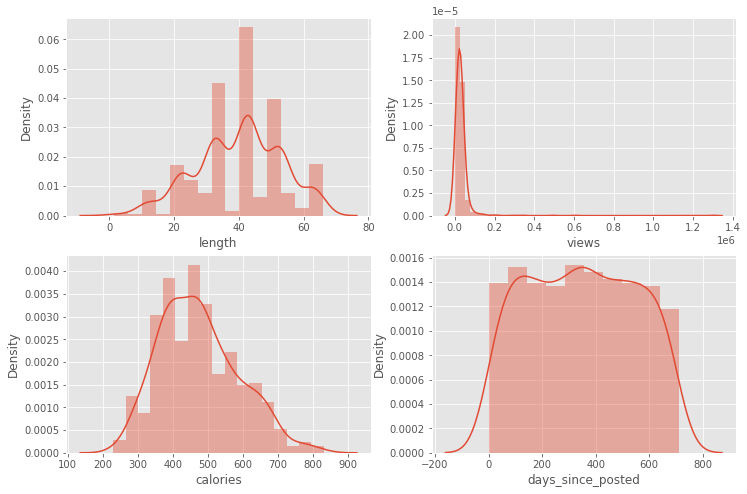

In [7]:
def plot_multiple_histograms(df, cols): 
    num_plots = len(cols) # 4 kolan
    num_cols = math.ceil(np.sqrt(num_plots))  # 2
    num_rows = math.ceil(num_plots/num_cols)  # 4/2 = 2
        
    fig, axs = plt.subplots(num_rows, num_cols)  # 2 satƒ±r ve 2 s√ºtundan olu≈üssun
    
    for index, col in enumerate(cols):
        i = math.floor(index/num_cols)
        j = index - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df, ['length', 'views', 'calories', 'days_since_posted'])

Farklƒ± deƒüi≈ükenlerin farklƒ± daƒüƒ±lƒ±m ≈üekilleri, aykƒ±rƒ± deƒüerler, √ßarpƒ±klƒ±k vb. G√∂sterdiƒüini g√∂rebiliriz.

# Tek Deƒüi≈ükenli Analiz: Kategorik Deƒüi≈ükenler
## √áubuk Grafik: Tek Deƒüi≈üken
√áubuk grafik (veya Seaborn olarak countplot) histogramƒ±n kategorik deƒüi≈ükenler versiyonudur.
Bir √ßubuk grafik, farklƒ± kategoriler arasƒ±ndaki kar≈üƒ±la≈ütƒ±rmalarƒ± g√∂sterir.


* √ñncelikle kategorik (sayƒ±sal olmayan) deƒüi≈ükenleri se√ßelim. Egzersiz videosunun odaklandƒ±ƒüƒ± v√ºcut alanlarƒ±nƒ± temsil eden deƒüi≈üken **area** (alan) i√ßin √ßubuk grafiƒüi √ßiziyoruz.

<AxesSubplot:xlabel='area', ylabel='count'>

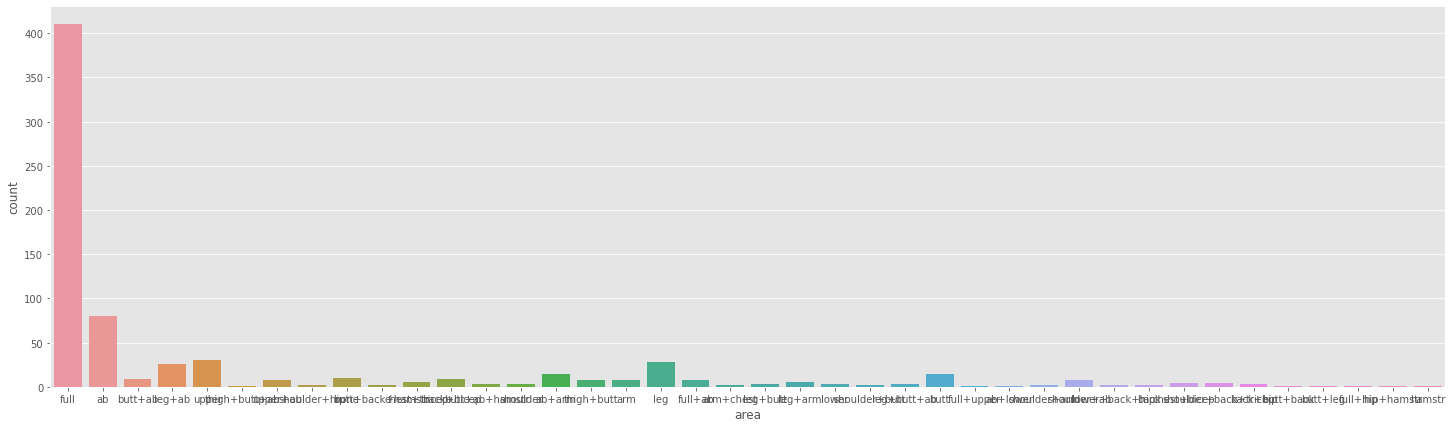

In [8]:
df_non_numeric = df.select_dtypes(exclude="number")

plt.figure(figsize=(25,7))

sns.countplot(x="area", data = df_non_numeric)

Videolarƒ±n hedeflediƒüi bir√ßok alan var. Yakƒ±nla≈ütƒ±rmadan okumak zor. Yine de, bu videolarƒ±n yarƒ±sƒ±ndan fazlasƒ±nƒ±n (400'den fazla) ‚Äúfull‚Äù alanƒ±na odaklandƒ±ƒüƒ±nƒ± g√∂rebiliyoruz; ikinci en pop√ºler alan ise "ab" dir.

## √áubuk Grafik: √áoklu Deƒüi≈ükenler

Ayrƒ±ca, birden √ßok deƒüi≈ükenin √ßubuk grafiklerini aynƒ± anda √ßizmek i√ßin **plot_multiple_countplots** i≈ülevini olu≈üturuyoruz .

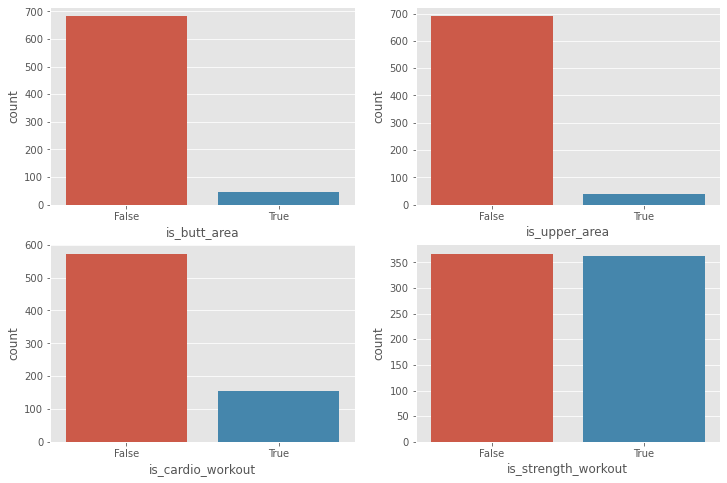

In [9]:
def plot_multiple_countplots(df, cols):
    
    num_plot = len(cols) # ka√ß s√ºtun varsa o kadar grafik √ßizilecek
    
    num_cols = math.ceil(np.sqrt(num_plot))
    num_rows = math.ceil(num_plot/num_cols)
    
    fig, ax = plt.subplots(num_rows, num_cols)
    
    for index, col in enumerate(cols):
        
        i = math.floor(index/num_cols)
        j = index - i*num_cols
        
        if num_rows == 1: # 1. satƒ±da isek
            if num_cols == 1: # 1.s√ºtuna
                sns.countplot(x=df[col], ax = ax)
            else:
                sns.countplot(x=df[col], ax = ax[j])
        else:
            sns.countplot(x=df[col], ax = ax[i,j])
                
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])
    

# √áok Deƒüi≈ükenli Analiz
Deƒüi≈ükenleri tek tek inceledikten sonra, birden √ßok deƒüi≈ükene birlikte bakalƒ±m.

Farklƒ± deƒüi≈üken kombinasyonlarƒ± arasƒ±ndaki ili≈ükileri ke≈üfetmek i√ßin farklƒ± grafikler kullanƒ±labilir.
## Daƒüƒ±lƒ±m Grafiƒüi: ƒ∞ki Sayƒ±sal Deƒüi≈üken
ƒ∞lk olarak, iki sayƒ±sal deƒüi≈üken arasƒ±ndaki ili≈ükiyi nasƒ±l ke≈üfedebileceƒüimize bakalƒ±m.

> **Egzersiz uzunluƒüunun g√∂r√ºnt√ºleme sayƒ±sƒ±nƒ± nasƒ±l etkilediƒüine bakalƒ±m.**

Soruyu yanƒ±tlamak i√ßin **daƒüƒ±lƒ±m grafikleri ( relplot )** kullanabiliriz.

Bir sa√ßƒ±lma grafiƒüidir veri k√ºmesi i√ßin, tipik olarak iki deƒüi≈üken deƒüerlerini g√∂sterir Kartezyen koordinatlarƒ± kullanƒ±r. Noktalar kodlanmƒ±≈üsa (renk / ≈üekil / boyut), bir ek deƒüi≈üken g√∂r√ºnt√ºlenebilir.

Veriler, her biri yatay eksendeki konumu belirleyen bir deƒüi≈ükenin deƒüerine ve dikey eksendeki konumu belirleyen diƒüer deƒüi≈ükenin deƒüerine sahip bir noktalar topluluƒüu olarak g√∂r√ºnt√ºlenir.

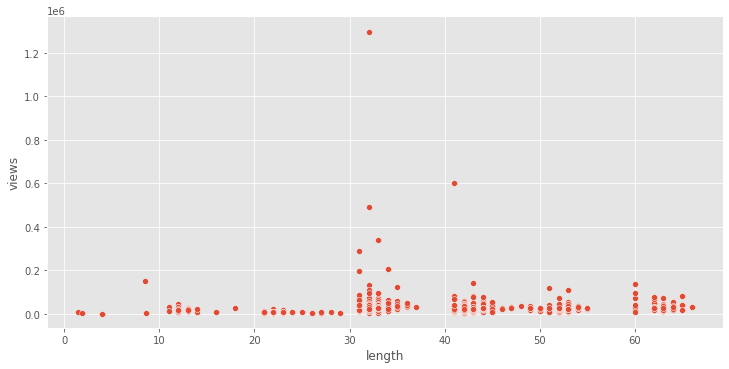

In [10]:
sns.relplot(x="length", y="views", data=df, aspect=2.0)

* Daha pop√ºler videolarƒ±n 30 ila 40 dakika arasƒ±nda uzunluklara sahip olduƒüunu g√∂rebiliriz.

## √áubuk Grafik: ƒ∞ki Kategorik Deƒüi≈üken

> **Videolar i√ßinde en yaygƒ±n 6 alanƒ± ( alan2 ) ve en yaygƒ±n 4 egzersiz t√ºr√ºn√º (egzersiz_tipi2) g√∂rselle≈ütirelim.**

In [11]:
df.area.value_counts() # video i√ßerisindeki alanlarƒ±n b√ºy√ºkten k√º√ß√ºƒüe sƒ±ralanƒ±≈üƒ±

full                    410
ab                       80
upper                    30
leg                      28
leg+ab                   26
ab+arm                   15
butt                     14
none                     10
back+bicep                9
butt+ab                   9
shoulder+ab               8
upper+ab                  8
thigh+butt                8
arm                       8
full+ab                   8
chest+tricep              5
leg+arm                   5
chest+bicep               4
shoulder+back+tricep      4
lower                     3
back+hip                  3
leg+butt+ab               3
leg+butt                  3
shoulder                  3
butt+ab+hamstr            3
shoulder+butt             2
lower+back+hip            2
shoulder+hip              2
butt+back+hamstr          2
arm+chest                 2
back                      2
shoulder+arm              2
ab+lower                  1
full+upper                1
thigh+butt+ab             1
butt+back           

In [12]:
df.area.value_counts()[:5] # zaten sƒ±ralƒ± olan en b√ºy√ºk 5 egzersiz alanƒ±

full      410
ab         80
upper      30
leg        28
leg+ab     26
Name: area, dtype: int64

In [13]:
df.area.value_counts().index[:5] # en b√ºy√ºk be≈ü egzersizin indexlerini aldƒ±k.

Index(['full', 'ab', 'upper', 'leg', 'leg+ab'], dtype='object')

In [14]:
list(df.area.value_counts().index[:5]) # bu egzersizleri liste haline getirdik.

['full', 'ab', 'upper', 'leg', 'leg+ab']

In [15]:
top6 = list(df.area.value_counts().index[:5])
df["area2"] = df["area"]

msk = df["area2"].isin(top6)
df.loc[~msk, "area2"] = "Other"  # area2 i√ßinde en b√ºy√ºk 5 egzersiz alanƒ±nƒ±n dƒ±≈üƒ±nda kalanlara "Other" yaz.


top4 = list(df["workout_type"].value_counts().index[:3])
df["workout_type2"] = df["workout_type"]

msk = df["workout_type2"].isin(top4)
df.loc[~msk,"workout_type2"] = "Other"

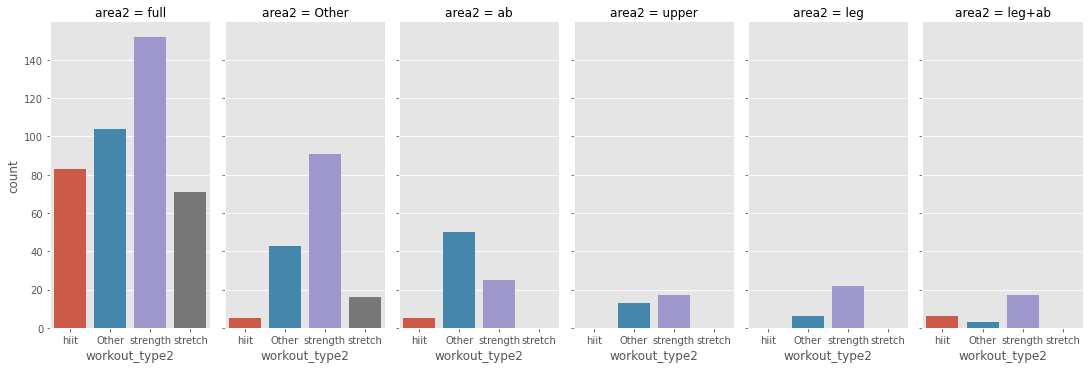

In [16]:
order = df["area2"].value_counts().index # s√ºtun indexlerini(deƒüerlerini) b√ºy√ºkten k√º√ß√ºƒüe sƒ±ralƒ±yoruz.

sns.catplot(x="workout_type2",
            col='area2', # Izgaranƒ±n y√∂n√ºn√º belirleyecek kategorik deƒüi≈ükenler.
            col_order=order,
            kind="count", data=df,
            aspect=0.5);

* Videolarda en yaygƒ±n olarak "tam" v√ºcut "g√ºc√º" egzersizlerinin olduƒüunu g√∂rebiliriz.

# Kutu grafiƒüi: Sayƒ±sal ve Kategorik Deƒüi≈ükenler
Kutu grafikleri , kategori gruplarƒ±nƒ± birlikte kar≈üƒ±la≈ütƒ±rƒ±rken yararlƒ± g√∂rselle≈ütirmelerdir.

Bir kutu grafiƒüi, veri k√ºmesini be≈ü numaralƒ± bir √∂zete dayalƒ± olarak g√∂r√ºnt√ºlemenin standart bir yoludur: minimum, maksimum, √∂rnek medyan ve birinci ve √º√ß√ºnc√º √ßeyrekler.
Bir sayƒ±sal deƒüi≈ükeni kategorik bir deƒüi≈ükenin kategorileri arasƒ±nda kar≈üƒ±la≈ütƒ±rmak i√ßin yan yana kutu grafiklerini kullanabiliriz.

> **Sydney'in videolarƒ± haftanƒ±n belirli g√ºnlerinde daha fazla g√∂r√ºnt√ºleniyor mu?**

<AxesSubplot:xlabel='day_of_week', ylabel='views'>

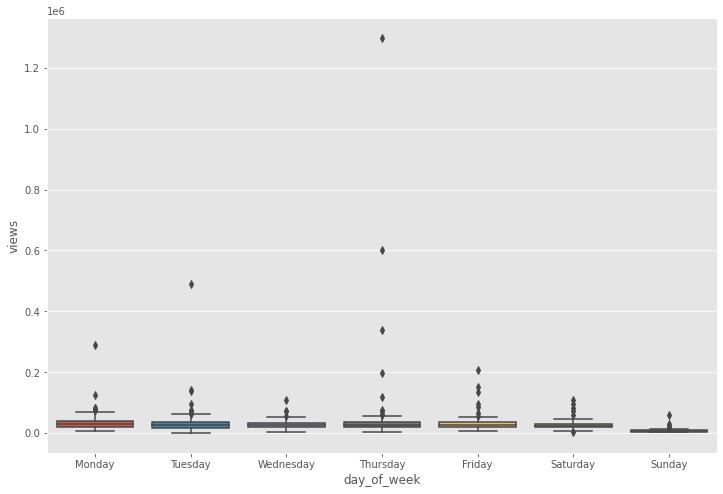

In [17]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df["day_of_week_num"] = df.date.dt.dayofweek
df["day_of_week"] = df["day_of_week_num"].replace(to_replace = to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views" , data=df, order=order)
# order ile x ekseninde g√ºnlerin sƒ±rasƒ±nƒ± grafikteki g√∂r√ºnt√ºs√ºn√º istediƒüimiz sƒ±raya g√∂re ayarladƒ±k.

Bu ilgin√ß ama aykƒ±rƒ± deƒüerler nedeniyle g√∂r√ºlmesi zor. Onlarƒ± kaldƒ±ralƒ±m.

<AxesSubplot:xlabel='day_of_week', ylabel='views'>

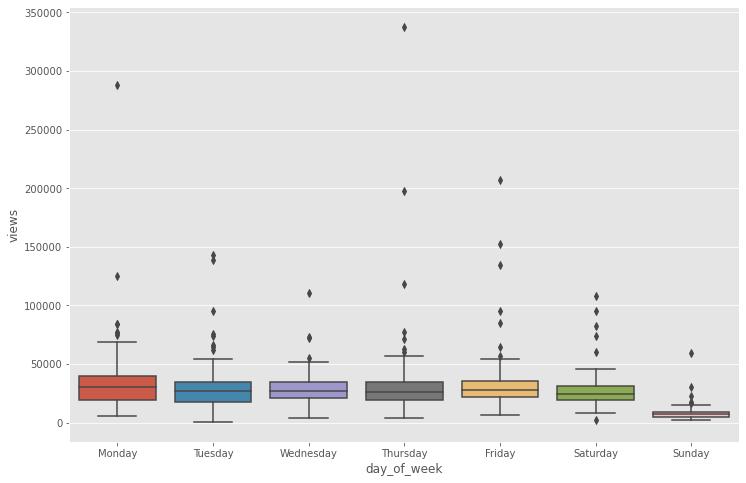

In [18]:
msk = df.views < 400000
sns.boxplot(x = "day_of_week", y = "views", data = df[msk], order = order)

Pazar videolarƒ± en az g√∂r√ºnt√ºlemeyi alƒ±rken. Pazartesi videolarƒ±nƒ±n diƒüer g√ºnlerden daha fazla izlenme eƒüiliminde olduƒüunu g√∂rebiliyoruz. 

# Swarmplot: Sayƒ±sal ve Kategorik Deƒüi≈ükenler
Aynƒ± soruya bakmanƒ±n ba≈üka bir yolu da Swarmplot'dur.

Bir Swarmplot noktalarƒ± √ºst √ºste gelmeyecek ≈üekilde  kategorik daƒüƒ±lƒ±m olup (sadece kategorik ekseni boyunca) ayarlanƒ±r.

Bu, deƒüerlerin daƒüƒ±lƒ±mƒ±nƒ±n daha iyi bir temsilini verir.

<AxesSubplot:xlabel='day_of_week', ylabel='views'>

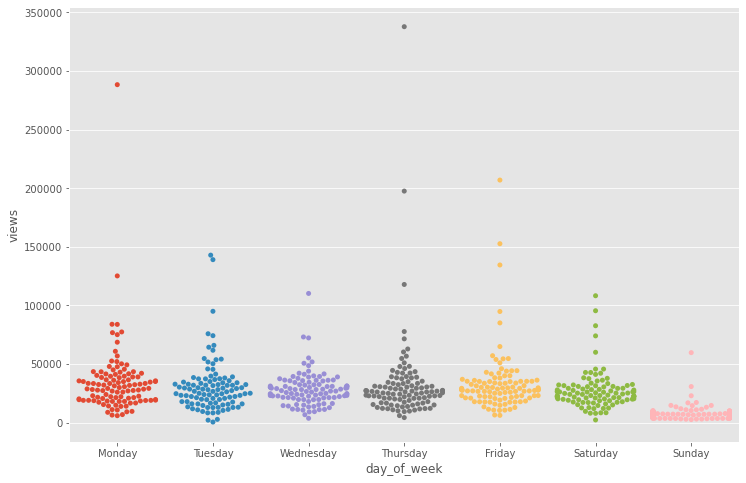

In [19]:
sns.swarmplot(x="day_of_week", y="views", data=df[msk], order=order)

## Kutu grafiƒüi Grubu: Sayƒ±sal ve Kategorik Deƒüi≈ükenler
> **Belirli antrenman t√ºrleri i√ßin haftanƒ±n belirli g√ºnlerindeki g√∂r√º≈üler daha mƒ± y√ºksek?**

Bu soruyu cevaplamak i√ßin, iki kategorik deƒüi≈üken (egzersiz_t√ºr√º, haftanƒ±n_g√ºn√º) ve bir sayƒ±sal deƒüi≈üken (g√∂r√ºn√ºmler) dahil edilmi≈ütir.

Bakalƒ±m bu sorunun cevabƒ±nƒ± nasƒ±l g√∂rselle≈ütirebiliriz.

√ú√ß deƒüi≈ükeni birlikte g√∂rselle≈ütirmek i√ßin bir panel kutu grafiƒüi ( catplot ) kullanabiliriz.

* **Catplot, √ße≈üitli g√∂rsel temsillerden birini kullanarak bir sayƒ±sal ve bir veya daha fazla kategorik deƒüi≈üken arasƒ±ndaki ili≈ükiyi g√∂stermek i√ßin kullanƒ±≈ülƒ±dƒ±r.**

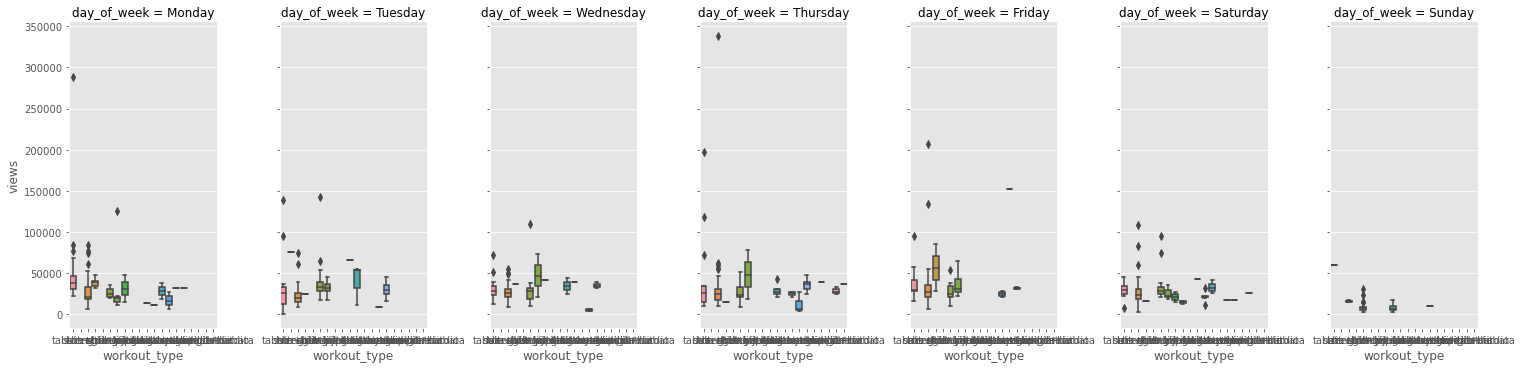

In [20]:
sns.catplot(x="workout_type", y="views",
            col="day_of_week", aspect=.6,
            kind="box", data=df[msk], col_order=order);

* √áok fazla egzersiz t√ºr√º olduƒüu i√ßin olduk√ßa karƒ±≈üƒ±k.

Antrenman t√ºr√º daƒüƒ±lƒ±mƒ±na g√∂re, "g√º√ß", "hiit", "esneme", "kardiyo" dƒ±≈üƒ±ndaki kategorileri "Diƒüer" olarak gruplandƒ±rƒ±yoruz.

In [21]:
df.workout_type.value_counts()

strength                324
hiit                     99
stretch                  87
cardio                   82
hiit+cardio              28
tabata+cardio            20
strength+hiit            16
tabata                   14
yoga                     13
none                     11
strength+cardio          10
pilat+cardio              8
pilat                     6
cardio+hiit               4
tabata+hiit+cardio        2
strength+hiit+cardio      1
tabata+hiit               1
yoga+pilat                1
tabata+pilat+cardio       1
strength+tabata           1
Name: workout_type, dtype: int64

In [22]:
top4 = list(df.workout_type.value_counts().index[:4])
df["workout_type2"] = df["workout_type"]

msk = df["workout_type2"].isin(top4)
df.loc[~msk,"workout_type2"] = "Other"

* Ayrƒ±ca, alanƒ± daha da netle≈ütirmek i√ßin aykƒ±rƒ± deƒüerleri kaldƒ±rƒ±yoruz.

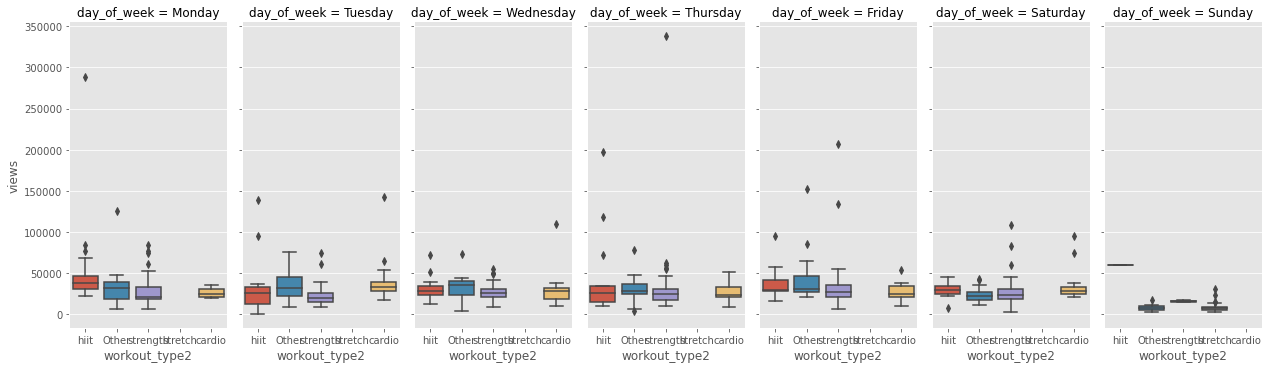

In [23]:
msk = df.views < 400000

sns.catplot(x="workout_type2", y="views",
            col="day_of_week",
            kind="box", data=df[msk], col_order=order,
            aspect=0.5)


A≈üaƒüƒ±daki gibi ≈üeyleri fark edebiliriz:

* "Stretch" (esneme) antrenmanlarƒ± sadece Pazar g√ºnleri yayƒ±nlanƒ±r.
* "Hiit" antrenmanlarƒ±nƒ±n Pazartesi g√ºnleri daha fazla izlendiƒüi g√∂r√ºl√ºyor.


> Birden √ßok deƒüi≈ükeni g√∂rselle≈ütirmek i√ßin pivot tablolarƒ± ve ƒ±sƒ± haritalarƒ±nƒ± da kullanabiliriz.

Bir **ƒ±sƒ± haritasƒ±** iki boyutta renk olarak bir fenomen b√ºy√ºkl√ºƒü√ºn√º g√∂steren bir veri g√∂rselle≈ütirme tekniƒüidir.

Renkteki varyasyon ton veya yoƒüunluk olabilir, bu da okuyucuya fenomenin nasƒ±l k√ºmelendiƒüi veya uzayda nasƒ±l deƒüi≈ütiƒüi konusunda a√ßƒ±k g√∂rsel ipu√ßlarƒ± verir.

* √ñrneƒüin, a≈üaƒüƒ±daki ƒ±sƒ± haritasƒ±nda eksen olarak alan ve egzersiz_tipi kategorileri vardƒ±r; renk √∂l√ßeƒüi her h√ºcredeki g√∂r√ºn√ºmleri temsil eder.

<AxesSubplot:xlabel='workout_type', ylabel='area'>

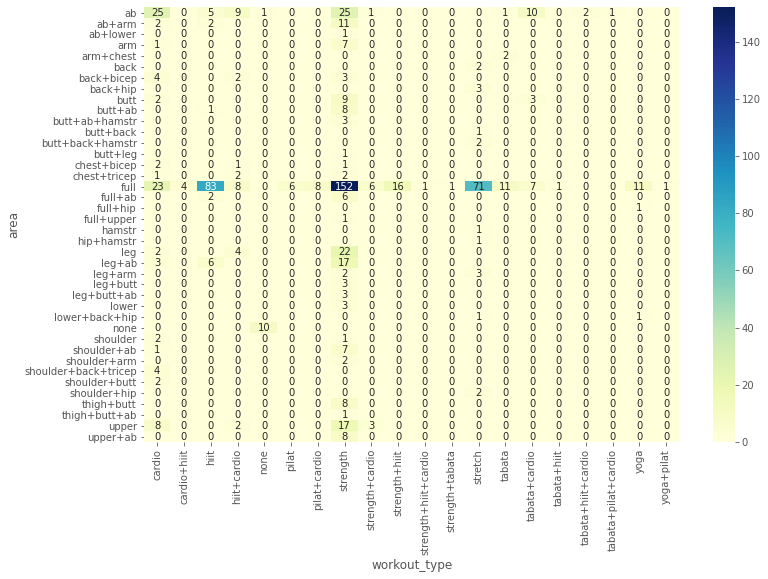

In [24]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()

df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)

sns.heatmap(df_area_workout_pivot, annot=True, fmt='.0f', cmap="YlGnBu")

# annot: True ise, her h√ºcreye veri deƒüerini yazƒ±n.
# fmt : A√ßƒ±klama eklerken kullanƒ±lacak dize bi√ßimlendirme kodu
# cmap : Veri deƒüerlerinden renk uzayƒ±na e≈üleme. 

### Yukarƒ±daki kodu adƒ±m adƒ±m inceleyelim..

In [25]:
df.groupby(['area', 'workout_type'])['views'].count() # ilgili alan ve kategoride ka√ß g√∂r√ºnt√ºleme var.

area      workout_type   
ab        cardio             25
          hiit                5
          hiit+cardio         9
          none                1
          strength           25
                             ..
upper     cardio              8
          hiit+cardio         2
          strength           17
          strength+cardio     3
upper+ab  strength            8
Name: views, Length: 89, dtype: int64

**reset_index():** DataFrame yapƒ±sƒ±nƒ± korumak i√ßin kullanƒ±lƒ±r.

In [26]:
df.groupby(["area","workout_type"])["views"].count().reset_index()

area     workout_type  views
0         ab           cardio     25
1         ab             hiit      5
2         ab      hiit+cardio      9
3         ab             none      1
4         ab         strength     25
..       ...              ...    ...
84     upper           cardio      8
85     upper      hiit+cardio      2
86     upper         strength     17
87     upper  strength+cardio      3
88  upper+ab         strength      8

[89 rows x 3 columns]

**df.pivot( index=None, columns=None, values=None ):** Verilen dizin/s√ºtun deƒüerlerine g√∂re d√ºzenlenen yeniden ≈üekillendirilmi≈ü DataFrame'i d√∂nd√ºr√ºr.

In [27]:
df_area_workout.pivot(index='area', columns='workout_type', values='views')

workout_type          cardio  cardio+hiit  hiit  hiit+cardio  none  pilat  \
area                                                                        
ab                      25.0          NaN   5.0          9.0   1.0    NaN   
ab+arm                   2.0          NaN   2.0          NaN   NaN    NaN   
ab+lower                 NaN          NaN   NaN          NaN   NaN    NaN   
arm                      1.0          NaN   NaN          NaN   NaN    NaN   
arm+chest                NaN          NaN   NaN          NaN   NaN    NaN   
back                     NaN          NaN   NaN          NaN   NaN    NaN   
back+bicep               4.0          NaN   NaN          2.0   NaN    NaN   
back+hip                 NaN          NaN   NaN          NaN   NaN    NaN   
butt                     2.0          NaN   NaN          NaN   NaN    NaN   
butt+ab                  NaN          NaN   1.0          NaN   NaN    NaN   
butt+ab+hamstr           NaN          NaN   NaN          NaN   NaN    NaN   
butt+back                NaN          NaN   NaN          NaN   NaN    NaN   
butt+back+hamstr         NaN          NaN   NaN          NaN   NaN    NaN   
butt+leg                 NaN          NaN   NaN          NaN   NaN    NaN   
chest+bicep              2.0          NaN   NaN          1.0   NaN    NaN   
chest+tricep             1.0          NaN   NaN          2.0   NaN    NaN   
full                    23.0          4.0  83.0          8.0   NaN    6.0   
full+ab                  NaN          NaN   2.0          NaN   NaN    NaN   
full+hip                 NaN          NaN   NaN          NaN   NaN    NaN   
full+upper               NaN          NaN   NaN          NaN   NaN    NaN   
hamstr                   NaN          NaN   NaN          NaN   NaN    NaN   
hip+hamstr               NaN          NaN   NaN          NaN   NaN    NaN   
leg                      2.0          NaN   NaN          4.0   NaN    NaN   
leg+ab                   3.0          NaN   6.0          NaN   NaN    NaN   
leg+arm                  NaN          NaN   NaN          NaN   NaN    NaN   
leg+butt                 NaN          NaN   NaN          NaN   NaN    NaN   
leg+butt+ab              NaN          NaN   NaN          NaN   NaN    NaN   
lower                    NaN          NaN   NaN          NaN   NaN    NaN   
lower+back+hip           NaN          NaN   NaN          NaN   NaN    NaN   
none                     NaN          NaN   NaN          NaN  10.0    NaN   
shoulder                 2.0          NaN   NaN          NaN   NaN    NaN   
shoulder+ab              1.0          NaN   NaN          NaN   NaN    NaN   
shoulder+arm             NaN          NaN   NaN          NaN   NaN    NaN   
shoulder+back+tricep     4.0          NaN   NaN          NaN   NaN    NaN   
shoulder+butt            2.0          NaN   NaN          NaN   NaN    NaN   
shoulder+hip             NaN          NaN   NaN          NaN   NaN    NaN   
thigh+butt               NaN          NaN   NaN          NaN   NaN    NaN   
thigh+butt+ab            NaN          NaN   NaN          NaN   NaN    NaN   
upper                    8.0          NaN   NaN          2.0   NaN    NaN   
upper+ab                 NaN          NaN   NaN          NaN   NaN    NaN   

workout_type          pilat+cardio  strength  strength+cardio  strength+hiit  \
area                                                                           
ab                             NaN      25.0              1.0            NaN   
ab+arm                         NaN      11.0              NaN            NaN   
ab+lower                       NaN       1.0              NaN            NaN   
arm                            NaN       7.0              NaN            NaN   
arm+chest                      NaN       NaN              NaN            NaN   
back                           NaN       NaN              NaN            NaN   
back+bicep                     NaN       3.0              NaN            NaN   
back+hip                       NaN       NaN 

In [28]:
df_area_workout.pivot(index="area", columns="workout_type", values="views").fillna(0)
# Bo≈ü verilere 0 deƒüerini atadƒ±k.

workout_type          cardio  cardio+hiit  hiit  hiit+cardio  none  pilat  \
area                                                                        
ab                      25.0          0.0   5.0          9.0   1.0    0.0   
ab+arm                   2.0          0.0   2.0          0.0   0.0    0.0   
ab+lower                 0.0          0.0   0.0          0.0   0.0    0.0   
arm                      1.0          0.0   0.0          0.0   0.0    0.0   
arm+chest                0.0          0.0   0.0          0.0   0.0    0.0   
back                     0.0          0.0   0.0          0.0   0.0    0.0   
back+bicep               4.0          0.0   0.0          2.0   0.0    0.0   
back+hip                 0.0          0.0   0.0          0.0   0.0    0.0   
butt                     2.0          0.0   0.0          0.0   0.0    0.0   
butt+ab                  0.0          0.0   1.0          0.0   0.0    0.0   
butt+ab+hamstr           0.0          0.0   0.0          0.0   0.0    0.0   
butt+back                0.0          0.0   0.0          0.0   0.0    0.0   
butt+back+hamstr         0.0          0.0   0.0          0.0   0.0    0.0   
butt+leg                 0.0          0.0   0.0          0.0   0.0    0.0   
chest+bicep              2.0          0.0   0.0          1.0   0.0    0.0   
chest+tricep             1.0          0.0   0.0          2.0   0.0    0.0   
full                    23.0          4.0  83.0          8.0   0.0    6.0   
full+ab                  0.0          0.0   2.0          0.0   0.0    0.0   
full+hip                 0.0          0.0   0.0          0.0   0.0    0.0   
full+upper               0.0          0.0   0.0          0.0   0.0    0.0   
hamstr                   0.0          0.0   0.0          0.0   0.0    0.0   
hip+hamstr               0.0          0.0   0.0          0.0   0.0    0.0   
leg                      2.0          0.0   0.0          4.0   0.0    0.0   
leg+ab                   3.0          0.0   6.0          0.0   0.0    0.0   
leg+arm                  0.0          0.0   0.0          0.0   0.0    0.0   
leg+butt                 0.0          0.0   0.0          0.0   0.0    0.0   
leg+butt+ab              0.0          0.0   0.0          0.0   0.0    0.0   
lower                    0.0          0.0   0.0          0.0   0.0    0.0   
lower+back+hip           0.0          0.0   0.0          0.0   0.0    0.0   
none                     0.0          0.0   0.0          0.0  10.0    0.0   
shoulder                 2.0          0.0   0.0          0.0   0.0    0.0   
shoulder+ab              1.0          0.0   0.0          0.0   0.0    0.0   
shoulder+arm             0.0          0.0   0.0          0.0   0.0    0.0   
shoulder+back+tricep     4.0          0.0   0.0          0.0   0.0    0.0   
shoulder+butt            2.0          0.0   0.0          0.0   0.0    0.0   
shoulder+hip             0.0          0.0   0.0          0.0   0.0    0.0   
thigh+butt               0.0          0.0   0.0          0.0   0.0    0.0   
thigh+butt+ab            0.0          0.0   0.0          0.0   0.0    0.0   
upper                    8.0          0.0   0.0          2.0   0.0    0.0   
upper+ab                 0.0          0.0   0.0          0.0   0.0    0.0   

workout_type          pilat+cardio  strength  strength+cardio  strength+hiit  \
area                                                                           
ab                             0.0      25.0              1.0            0.0   
ab+arm                         0.0      11.0              0.0            0.0   
ab+lower                       0.0       1.0              0.0            0.0   
arm                            0.0       7.0              0.0            0.0   
arm+chest                      0.0       0.0              0.0            0.0   
back                           0.0       0.0              0.0            0.0   
back+bicep                     0.0       3.0              0.0            0.0   
back+hip                       0.0       0.0 

# ƒ∞li≈üki Testi ve Daƒüƒ±lƒ±m Grafiƒüi: Sayƒ±sal ve Kategorik Deƒüi≈ükenler
> **Birden √ßok deƒüi≈üken arasƒ±ndaki ili≈ükileri otomatik olarak nasƒ±l ke≈üfederiz?**

In [29]:
cols = ['length', 'views', 'calories', 'days_since_posted', 'area', 'workout_type', 'day_of_week']
df_test = df[cols]
df_test.head()

length   views  calories  days_since_posted  area workout_type day_of_week
0    31.0  197591     500.0              711.0  full         hiit    Thursday
1    31.0   75863       NaN              706.0  full  tabata+hiit     Tuesday
2    32.0   60328     350.0              704.0    ab     strength    Thursday
3    31.0   59741     430.0              701.0  full         hiit      Sunday
4    31.0   18515     285.0              700.0  full     strength      Monday

In [30]:
numeric_columns = set(df_test.select_dtypes(include=["number"]).columns) # Sayƒ±sal ve sayƒ±sal olmayan deƒüi≈ükenleri belirliyoruz.

non_numeric_columns = set(df_test.columns) - numeric_columns

print(numeric_columns)
print(non_numeric_columns)

{'views', 'length', 'days_since_posted', 'calories'}
{'workout_type', 'area', 'day_of_week'}


* 4 sayƒ±sal deƒüi≈ükenimiz ve 3 kategorik deƒüi≈ükenimiz var. Aralarƒ±nda bir√ßok karma≈üƒ±k ili≈üki olabilir!

Bu b√∂l√ºmde, aralarƒ±ndaki ili≈ükileri (√ßoklu baƒülantƒ± dahil) test etmek i√ßin Makine √ñƒürenimi teknikleriyle DAHA FAZLA YouTube G√∂r√ºnt√ºlemesi Nasƒ±l Elde Edilir konusunda olduƒüu gibi aynƒ± y√∂ntemi kullanƒ±yoruz .

Y√ºksek d√ºzeyde, bunu ba≈üarmak i√ßin **k-fold Cross-Validation** kullanƒ±yoruz.

ƒ∞lk √∂nce kategorik deƒüi≈ükenleri d√∂n√º≈üt√ºr√ºyoruz. 5-kat √ßapraz doƒürulama kullanacaƒüƒ±mƒ±z i√ßin, her kategori seviyesi i√ßin en az 5 g√∂zlem olduƒüundan emin olmamƒ±z gerekiyor.

In [31]:
for c in non_numeric_columns:
    cnt = df_test[c].value_counts()
    small_cnts = list(cnt[cnt<5].index)
    
    s_replace = {}
    
    for sm in small_cnts:
        
        s_replace[sm] = "other"
        
    df_test[c] = df_test[c].replace(s_replace)
    df_test[c] = df_test[c].fillna("other") 

Daha sonra, her deƒüi≈ükeni g√∂zden ge√ßirip diƒüer deƒüi≈ükenleri kullanarak onu tahmin etmek i√ßin bir model uyduruyoruz. Basit bir Gradient Boosting Model (GBM) modeli ve K-kat doƒürulamasƒ± kullanƒ±yoruz.

**Hedef deƒüi≈ükenin sayƒ±sal veya kategorik olmasƒ±na baƒülƒ± olarak, farklƒ± modeller ve puanlar uygularƒ±z.**

**Hedef sayƒ±sal olduƒüunda, Gradient Boosting Regressor modelini ve Root Mean Squared Error (RMSE) kullanƒ±rƒ±z ; hedef kategorik olduƒüunda, Gradient Boosting Classifier modelini ve Accuracy'yi kullanƒ±rƒ±z.**

Her hedef i√ßin, K-kat doƒürulama puanƒ±nƒ± (puanlarƒ±n ortalamasƒ±) ve en √∂nemli 5 √∂ng√∂r√ºc√ºy√º yazdƒ±rƒ±yoruz .

Ayrƒ±ca rastgele sayƒ±lardan olu≈üan rand0 , rand1 , rand2 √º√ß √∂zellik ekliyoruz . Deƒüi≈ükenler arasƒ±ndaki ili≈ükiyi kar≈üƒ±la≈ütƒ±rƒ±rken √ßapa g√∂revi g√∂r√ºrler. Bu rastgele deƒüi≈ükenlere kƒ±yasla bir yordayƒ±cƒ± daha az √∂nemli veya benzer ise, o zaman hedef deƒüi≈ükenin √∂nemli bir yordayƒ±cƒ±sƒ± deƒüildir.

In [32]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#√ñzellik √∂nemlerine bakacaƒüƒ±z, bu y√ºzden bir kƒ±yaslama olarak hareket etmek i√ßin rastgele √∂zellikler koyuyoruz.
df_test['rand0'] = np.random.rand(df_test.shape[0])
df_test['rand1'] = np.random.rand(df_test.shape[0])
df_test['rand2'] = np.random.rand(df_test.shape[0])

# ili≈ükiler i√ßin test.
# sayƒ±sal hedefler i√ßin.
reg = GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='ls',
                                random_state=1)
# kategorik hedefler i√ßin.
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='deviance',
                                random_state=1)

df_test['calories'] = df_test['calories'].fillna(0)# sadece kaloriler eksik deƒüerlere sahip olmalƒ±dƒ±r.

# doƒürusallƒ±ƒüƒ± test etmek i√ßin diƒüerlerini kullanarak bir √∂zelliƒüi tahmin etmeye √ßalƒ±≈üƒ±n, b√∂ylece sonu√ßlarƒ± yorumlamak daha kolay olur
for c in cols:
    #c tahmin edilecek ≈üeydir.
    
    if c not in ['rand0', 'rand1', 'rand2']: 

        X = df_test.drop([c], axis=1) # tahmin edilecek ≈üeyi bƒ±rak.
        X = pd.get_dummies(X)
        y = df_test[c]

        print(c)

        if c in non_numeric_columns:
            scoring = 'accuracy'
            model = clf
            scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
            print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        elif c in numeric_columns:
            scoring = 'neg_root_mean_squared_error'
            model = reg
            scores = cross_val_score(reg, X, y, cv=5, scoring=scoring)
            print(scoring.replace('neg_', '') + ": %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))
        else:
            print('what is this?')

        model.fit(X, y)
        df_importances = pd.DataFrame(data={'feature_name': X.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)
        top5_features = df_importances.iloc[:5]
        print('top 5 features:')
        print(top5_features)

        print()

length
root_mean_squared_error: 5.46 (+/- 1.96)
top 5 features:
        feature_name  importance
1           calories    0.802464
0              views    0.068391
2  days_since_posted    0.045976
3              rand0    0.015690
4              rand1    0.012770

views
root_mean_squared_error: 85904.80 (+/- 52091.34)
top 5 features:
         feature_name  importance
2   days_since_posted    0.591972
5               rand2    0.101822
21    area_thigh+butt    0.098298
4               rand1    0.051749
1            calories    0.045593

calories
root_mean_squared_error: 76.79 (+/- 41.49)
top 5 features:
          feature_name  importance
0               length    0.862700
1                views    0.052795
2    days_since_posted    0.024031
41  day_of_week_Sunday    0.014066
3                rand0    0.008332

days_since_posted
root_mean_squared_error: 188.10 (+/- 128.08)
top 5 features:
  feature_name  importance
1        views    0.308531
0       length    0.238709
2     calories    0.15

* Yukarƒ±daki sonu√ßlardan, hedef deƒüi≈ükenlerin her birine ve bunlarƒ±n yordayƒ±cƒ±larla ili≈ükisine bakabiliriz.

Uzunluk ve kalori arasƒ±nda g√º√ßl√º bir ili≈üki olduƒüunu g√∂rebiliriz.

Bunlarƒ± g√∂rselle≈ütirmek i√ßin bir daƒüƒ±lƒ±m grafiƒüi kullanalƒ±m: x ekseni uzunluk olarak ve y ekseni kalori olarak, noktalarƒ±n boyutu ise g√∂r√ºn√ºmleri temsil eder.

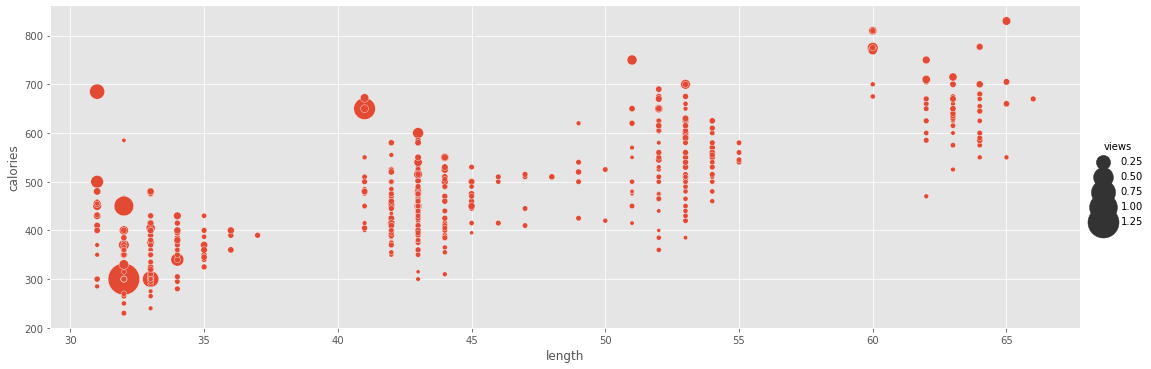

In [33]:
sns.relplot(x="length", y="calories", size="views", sizes=(10,1000), data=df, aspect=3.0)
# aspect : in√ß tipinde en boy oranƒ±nƒ± verir. Varsayƒ±lan 1

Video ne kadar uzun olursa o kadar fazla kalori yakƒ±ldƒ±ƒüƒ±nƒ± g√∂rebiliriz ki bu sezgiseldir. Daha fazla g√∂r√ºnt√ºlenen videolarƒ±n daha kƒ±sa bir uzunluƒüa sahip olma eƒüiliminde olduƒüunu da g√∂rebiliriz.